# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

The dataset contains information about direct marketing campaigns (phone calls) conducted by a Portuguese bank.
The UCI page and the paper both state that the data was collected from multiple marketing campaigns over a period of time.

**The dataset represents 17 different marketing campaigns conducted by the Portuguese bank between May 2008 and November 2010.**

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


In [91]:
df = pd.read_csv('/content/sample_data/bank-additional-full.csv', sep = ';')

In [92]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

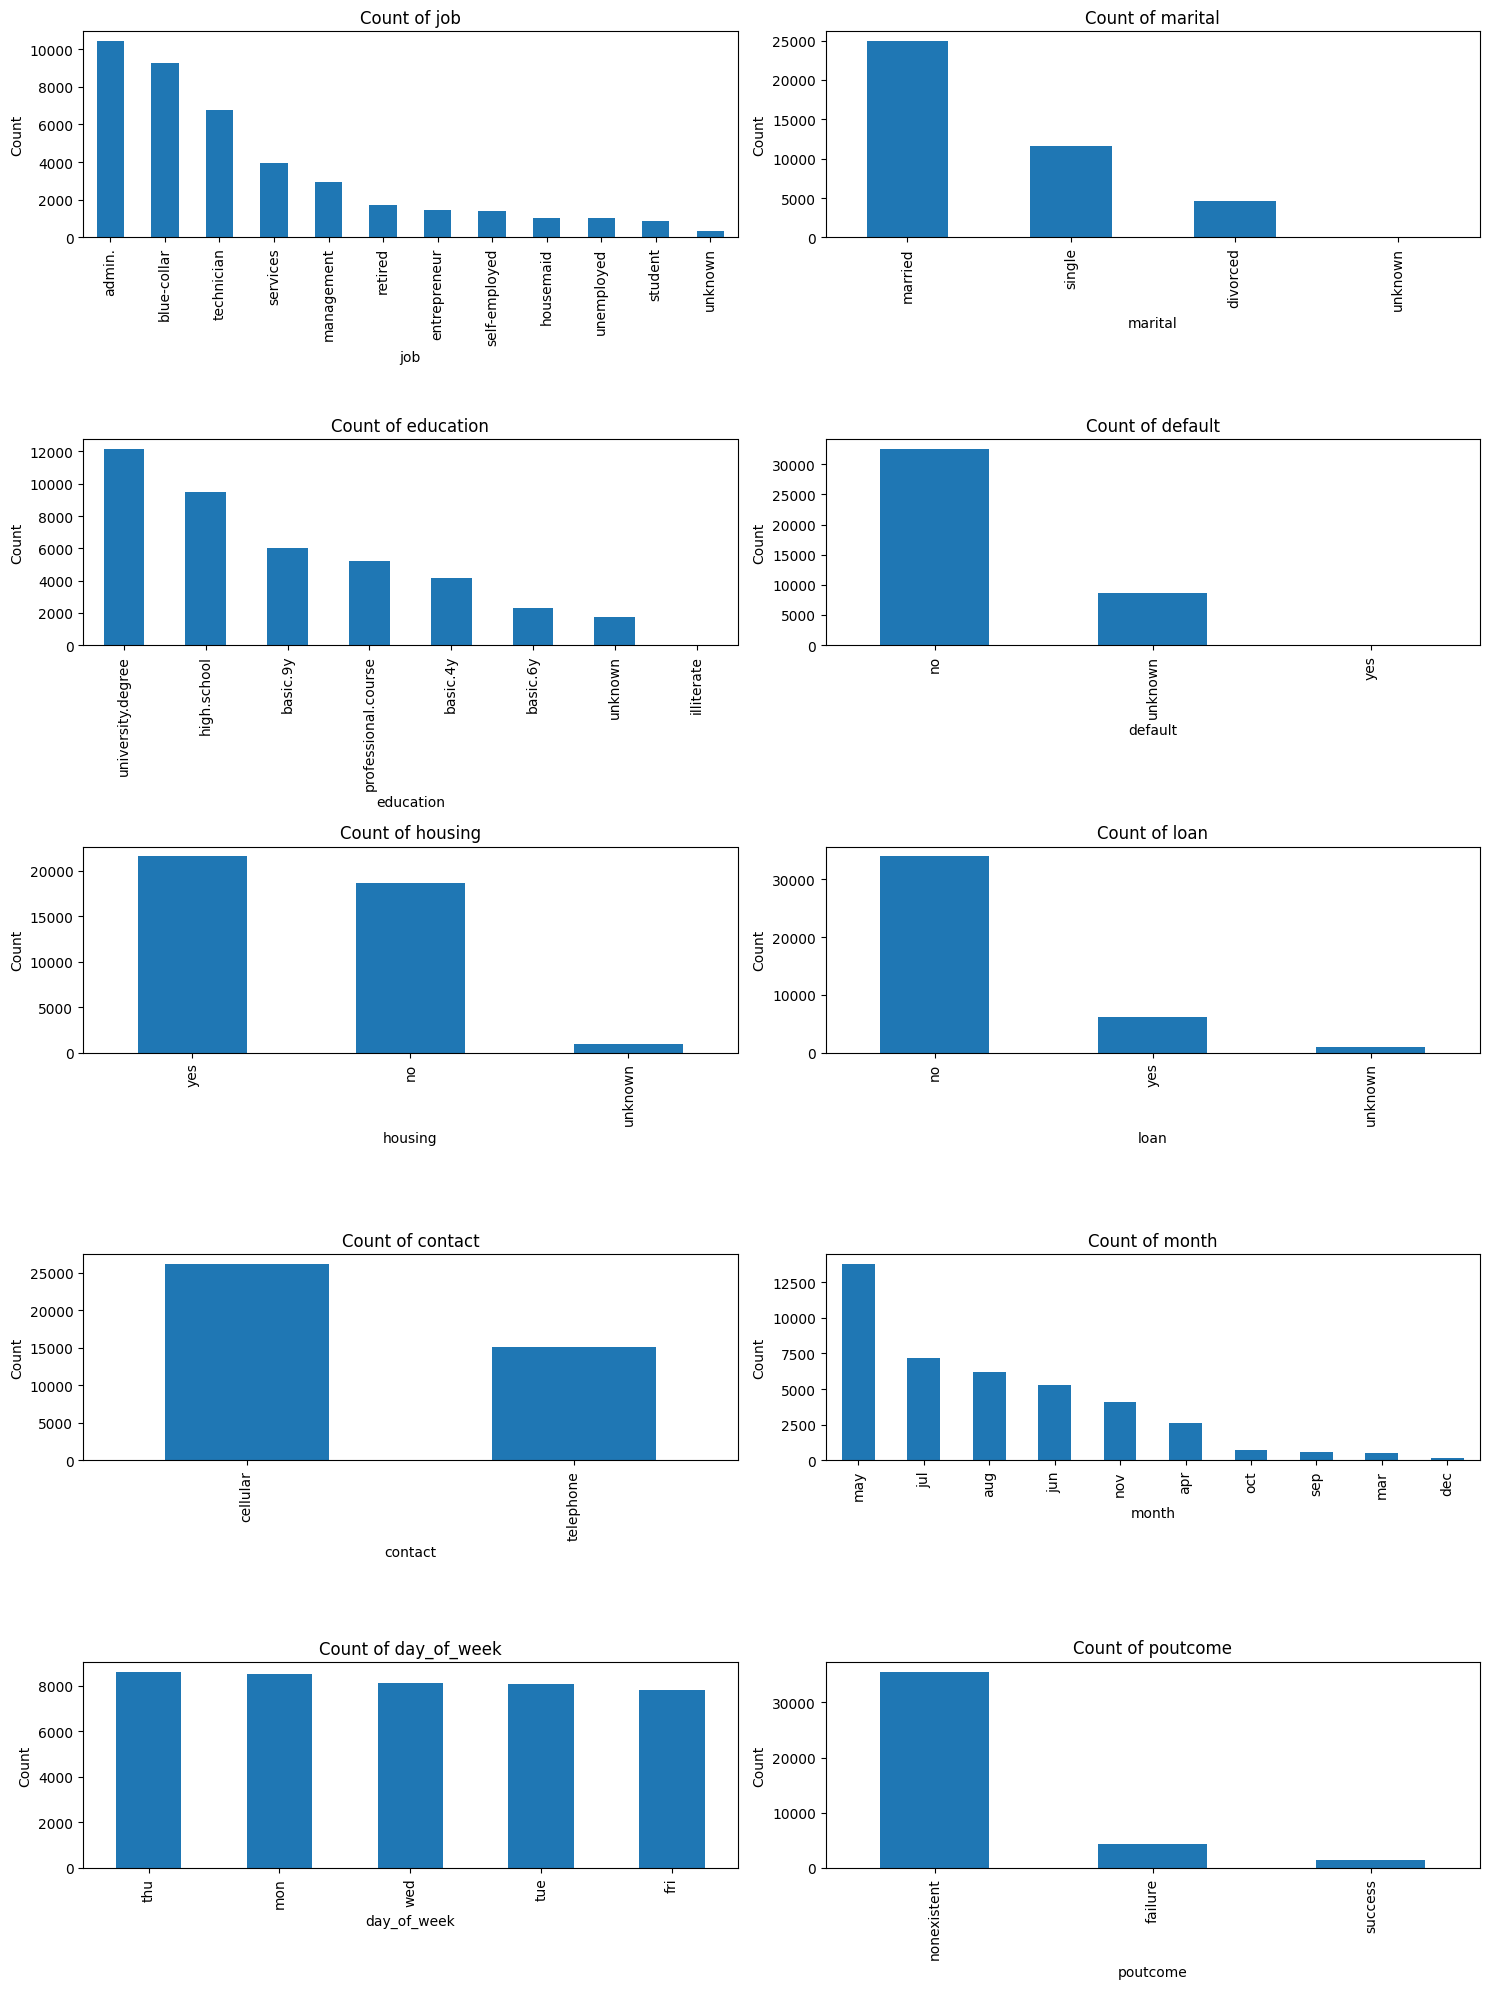

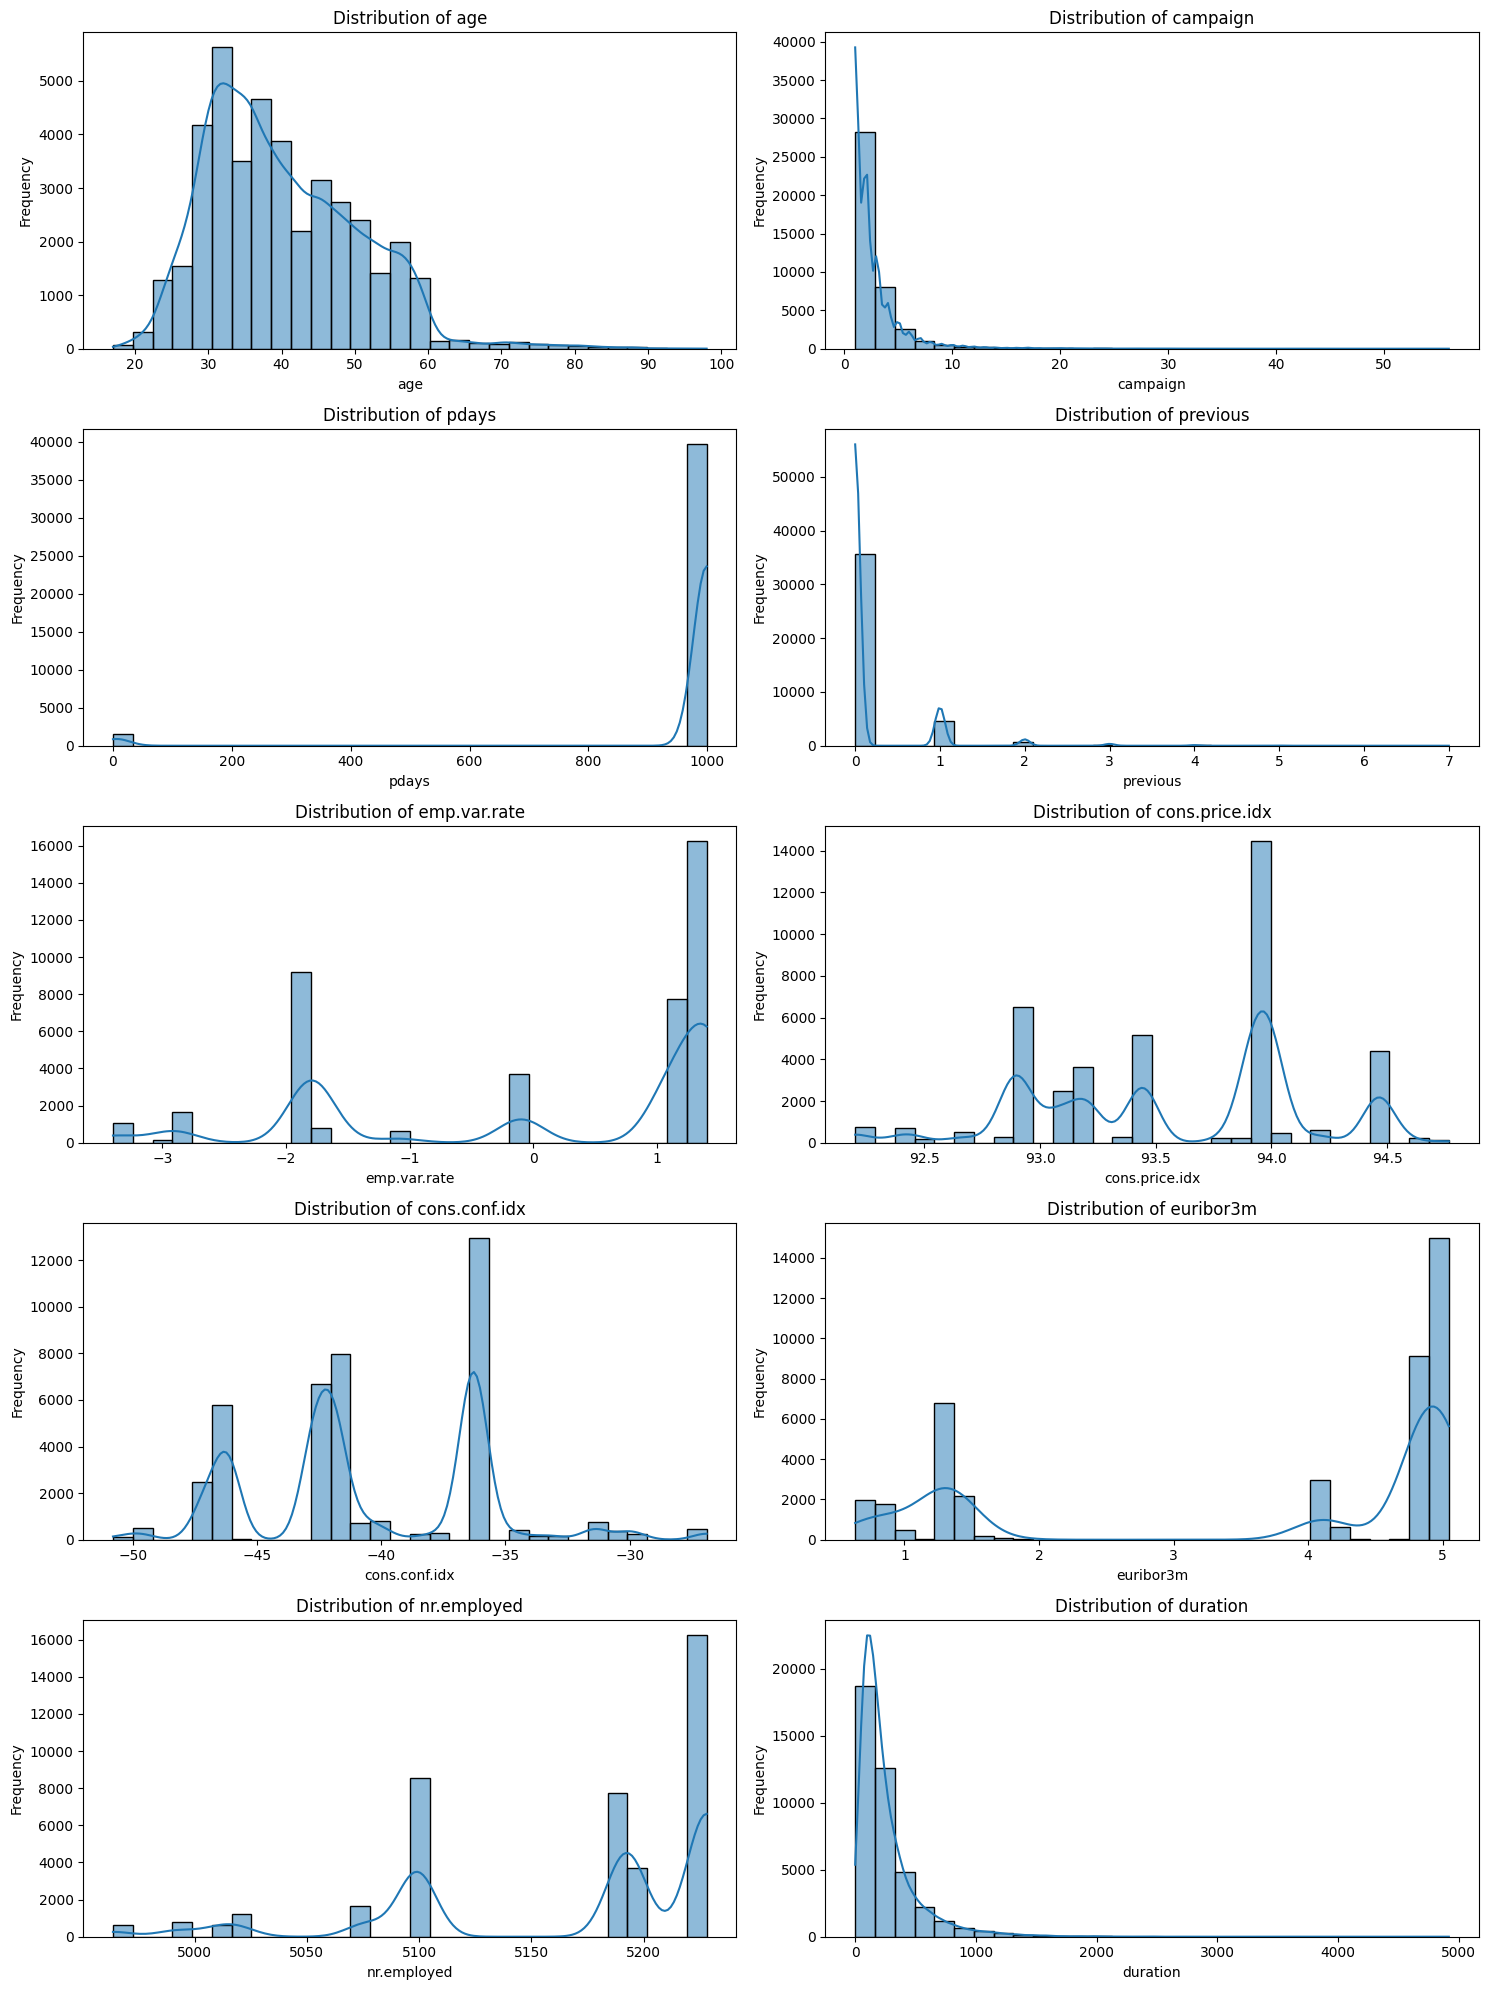

In [93]:
df.info()
df.isnull().sum()

#Plot Categorical Features
categorical_features = [
    'job', 'marital', 'education', 'default', 'housing', 'loan',
    'contact', 'month', 'day_of_week', 'poutcome'
]

plt.figure(figsize=(15, 20))
for i, col in enumerate(categorical_features, 1):
    plt.subplot(5, 2, i)
    df[col].value_counts(dropna=False).plot(kind='bar')
    plt.title(f'Count of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
plt.tight_layout()
plt.savefig('categorical_features.png')
plt.show()

#Plot Continuous Features
continuous_features = [
    'age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
    'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'duration'
]

plt.figure(figsize=(15, 20))
for i, col in enumerate(continuous_features, 1):
    plt.subplot(5, 2, i)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('continuous_features.png')
plt.show()



### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

Business Objective:

The goal is to use historical data from previous marketing campaigns to build a predictive model that helps the bank efficiently target clients who are most likely to respond positively (i.e., subscribe to a term deposit). By accurately predicting client responses, the bank can:

*   Increase the success rate of marketing campaigns
*   Optimize resource allocation (e.g., focus efforts on high-probability clients)
*   Reduce costs associated with unsuccessful contacts
*   Improve customer satisfaction by targeting relevant offers

Predict which clients will subscribe to a term deposit, enabling the bank to improve the effectiveness and efficiency of future marketing campaigns.

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [94]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import time
from sklearn.compose import ColumnTransformer

# Example features: age, job, marital, education, default, housing, loan, and the target variable 'y'
selected_features = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'y']

# Load the data, specifying the separator and the selected columns
df_bank = pd.read_csv('/content/sample_data/bank-additional-full.csv', sep=';', usecols=selected_features)

df_bank.dropna(inplace=True)
df_bank.isnull().sum()

# Replace 'unknown' with 'no' in the 'default' column
df_bank['default'] = df_bank['default'].replace('unknown', 'no')

# Replace 'unknown' with 'no' in the 'loan' column
df_bank['loan'] = df_bank['loan'].replace('unknown', 'no')

# Replace 'unknown' with mode of the values in the 'housing' column
#Identify the value to be replaced
value_to_replace = 'unknown'

# Calculate the mode of the column, excluding the 'unknown' values
mode_value = df_bank[df_bank['housing'] != value_to_replace]['housing'].mode()[0]

# Replace 'unknown' values with the calculated mode
df_bank['housing'] = df_bank['housing'].replace(value_to_replace, mode_value)

# Binary encoding for 'default', 'housing', 'loan'
binary_map = {'no': 0, 'yes': 1}
for col in ['default', 'housing', 'loan']:
    df_bank[col] = df_bank[col].map(binary_map)

# One-hot encoding for 'job', 'marital', 'education'
df_bank = pd.get_dummies(df_bank, columns=['job', 'marital', 'education'])

# Encode target
df_bank['y'] = df_bank['y'].map(binary_map)

# Separate features and target
X = df_bank.drop('y', axis=1)
y = df_bank['y']

# Encode target
le = LabelEncoder()
y = le.fit_transform(y)

# Identify categorical and numerical columns
categorical_columns = X.select_dtypes(include=['object']).columns.tolist()
numerical_columns = X.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Define the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(drop='first'), categorical_columns)
    ]
)

df_bank.head()
#df_bank.info()

,age,default,housing,loan,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown
0,56,0,0,0,0,False,False,False,True,False,...,False,False,True,False,False,False,False,False,False,False
1,57,0,0,0,0,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2,37,0,1,0,0,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,40,0,0,0,0,True,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
4,56,0,0,1,0,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [95]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [96]:

# Get the value counts of the target variable 'y'
class_counts = df_bank['y'].value_counts()

# Determine the majority class count
majority_class_count = class_counts.max()

# Get the total number of instances
total_instances = len(df_bank)

# Calculate the baseline accuracy
baseline_accuracy = majority_class_count / total_instances

print(f"Class counts:\n{class_counts}")
print(f"Total instances: {total_instances}")
print(f"Baseline accuracy (majority class percentage): {baseline_accuracy:.4f}")

Class counts:
y
0    36548
1     4640
Name: count, dtype: int64
Total instances: 41188
Baseline accuracy (majority class percentage): 0.8873


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [97]:
# 1. Instantiate the model
logreg = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)

# 2. Fit the model
logreg.fit(X_train, y_train)

# 3. Predict on test set
y_pred = logreg.predict(X_test)

### Problem 9: Score the Model

What is the accuracy of your model?

In [98]:
# 4. Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.6182325807234765
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.63      0.74      7303
           1       0.16      0.55      0.25       935

    accuracy                           0.62      8238
   macro avg       0.54      0.59      0.50      8238
weighted avg       0.83      0.62      0.69      8238

Confusion Matrix:
 [[4578 2725]
 [ 420  515]]


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [99]:
#Define Models
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'SVM': SVC(random_state=42)
}

#Fit, Score, and Time Each Model
results = []

for name, model in models.items():
    start_time = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_time

    train_acc = accuracy_score(y_train, model.predict(X_train))
    test_acc = accuracy_score(y_test, model.predict(X_test))

    results.append({
        'Model': name,
        'Train Time': round(train_time, 4),
        'Train Accuracy': round(train_acc, 4),
        'Test Accuracy': round(test_acc, 4)
    })

df_results = pd.DataFrame(results)
print(df_results)


                 Model  Train Time  Train Accuracy  Test Accuracy
0  Logistic Regression      2.9441          0.8876         0.8865
1                  KNN      0.0180          0.8907         0.8765
2        Decision Tree      0.1450          0.9100         0.8718
3                  SVM     25.5385          0.8876         0.8865


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.


- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [100]:
#Define Models and parameter grids for GridSearchCV
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    #'SVM': SVC(random_state=42)
}

param_grids = {
    'Logistic Regression': {'C': [0.001, 0.01, 0.1, 1, 10, 100]},
    'KNN': {'n_neighbors': [3, 5, 7, 9]},
    'Decision Tree': {'max_depth': [3, 5, 7, 9, None]},
    #'SVM': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
}


results = []

for name, model in models.items():
    # Create a pipeline
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', model) # Use a generic name for the classifier step
    ])

    # Get the parameter grid for the current model
    params = param_grids[name]

    # Perform grid search
    # Prefix the parameter names with 'classifier__' to match the pipeline step name
    grid_search_params = {f'classifier__{key}': value for key, value in params.items()}

    grid_search = GridSearchCV(pipeline, param_grid=grid_search_params, cv=5, n_jobs=-1)

    # Fit the model and time it
    start_time = time.time()
    grid_search.fit(X_train, y_train)
    fit_time = time.time() - start_time

    # Predict on test set
    #y_pred = grid.predict(X_test)
    #y_proba = grid.predict_proba(X_test)[:, 1] if hasattr(grid, "predict_proba") else grid.decision_function(X_test)

    # Calculate metrics
    #f1 = f1_score(y_test, y_pred)
    #roc_auc = roc_auc_score(y_test, y_proba)

    # Get the best estimator
    best_model = grid_search.best_estimator_
    print(f"Best parameters for {name}: {grid_search.best_params_}")
    print(f"Best score for {name}: {grid_search.best_score_}")
    #print(f"Best estimator for {name}: {best_model}") # This can print a lot of info

    # Evaluate on training and test sets
    train_score = best_model.score(X_train, y_train)
    test_score = best_model.score(X_test, y_test)

    # Append the results
    results.append({
        'Model': name,
        'Train Time': round(fit_time, 4),
        'Train Accuracy': round(train_score, 4),
        'Test Accuracy': round(test_score, 4)
    })


# Create the results DataFrame
results_df = pd.DataFrame(results)
results_df.set_index('Model', inplace=True)


display(results_df)

Best parameters for Logistic Regression: {'classifier__C': 0.001}
Best score for Logistic Regression: 0.8875569044006071
Best parameters for KNN: {'classifier__n_neighbors': 7}
Best score for KNN: 0.8864339908952958
Best parameters for Decision Tree: {'classifier__max_depth': 3}
Best score for Decision Tree: 0.887496206373293


,Train Time,Train Accuracy,Test Accuracy
Model,,,
Logistic Regression,0.9313,0.8876,0.8865
KNN,7.9554,0.8895,0.8849
Decision Tree,0.8596,0.8879,0.8866


##### Questions